In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import random
from google.colab import drive
from google.colab.patches import cv2_imshow


## Loading Dataset from Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.listdir("/content/drive/My Drive/ASL")

['D',
 'X',
 'A',
 'U',
 'B',
 'E',
 'Y',
 'C',
 'V',
 'W',
 'L',
 'G',
 'O',
 'P',
 'F',
 'M',
 'H',
 'N',
 'I',
 'K',
 'T',
 'R',
 'Q',
 'S',
 'training_data.pkl',
 'testing_data.pkl',
 'model.h5']

In [ ]:
CATEGORIES = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
print(CATEGORIES)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [ ]:
len(CATEGORIES)

24

In [ ]:
import pickle 

In [ ]:
infile = open('/content/drive/My Drive/ASL/training_data.pkl','rb')
train = pickle.load(infile)
infile.close()

In [ ]:
len(train)

3977

In [ ]:
infile = open('/content/drive/My Drive/ASL/testing_data.pkl','rb')
test = pickle.load(infile)
infile.close()

In [ ]:
len(test)

995

In [ ]:
train[0][0].shape

(100, 100)

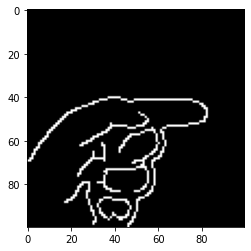

In [ ]:
plt.imshow(train[0][0], cmap='gray')

In [ ]:
CATEGORIES[train[0][1]]

'G'

In [ ]:
train[0][0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Creating X_train, X_test, y_train, y_test

In [ ]:
X_train = np.zeros((len(train),100,100))
y_train = np.zeros((len(train),1), dtype = int)
for i in range(len(train)) :
  X_train[i] = train[i][0]
  y_train[i] = train[i][1]


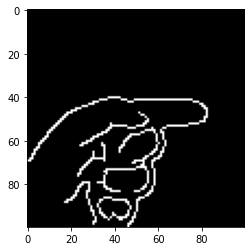

In [ ]:
plt.imshow(X_train[0], cmap='gray')

In [ ]:
CATEGORIES[y_train[0][0]]

'G'

In [ ]:
X_train.shape

(3977, 100, 100)

In [ ]:
y_train.shape

(3977, 1)

In [ ]:
X_test = np.zeros((len(test),100,100))
y_test = np.zeros((len(test),1), dtype = int)
for i in range(len(test)) :
  X_test[i] = test[i][0]
  y_test[i] = test[i][1]

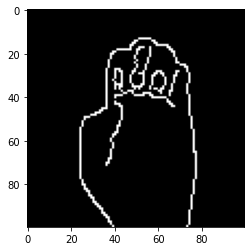

In [ ]:
plt.imshow(X_test[0], cmap='gray')

In [ ]:
CATEGORIES[y_test[0][0]]

'E'

In [ ]:
# Resizing X_train, X_test to (len(),100,100,1) since its necessary for training and testing in model
X_train = np.expand_dims(X_train, axis=3)
X_train.shape

(3977, 100, 100, 1)

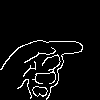

In [ ]:
cv2_imshow(X_train[0])

In [ ]:
X_test = np.expand_dims(X_test, axis=3)
X_test.shape

(995, 100, 100, 1)

In [ ]:
pip install tensorflow-gpu 

     |████████████████████████████████| 394.3MB 37kB/s 


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,BatchNormalization

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (100,100,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(24,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 50, 50, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size = 20, validation_data=(X_test, y_test))

In [ ]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')

plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [ ]:
model.save('/content/drive/My Drive/ASL/model.h5')

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('model, accuracy: {:5.2f}%'.format(100 * acc))

32/32 - 10s - loss: 0.0207 - accuracy: 0.9950
model, accuracy: 99.50%


In [ ]:
model = load_model('/content/drive/My Drive/ASL/model.h5')

## Predictions for the test data
predicted_classes = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1) # returns an array of all predictions

In [ ]:
predicted_classes

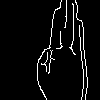

In [ ]:
cv2_imshow(X_test[100])

In [ ]:
CATEGORIES[y_test[100][0]]

'B'

In [ ]:
CATEGORIES[predicted_classes[100]]

'B'

In [ ]:
img = np.expand_dims(X_test[0], axis=0)
img.shape

(1, 100, 100, 1)

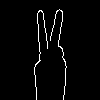

In [ ]:
cv2_imshow(X_test[5])

In [ ]:
CATEGORIES[predicted_classes[5]]

'V'

In [ ]:
def predict(img):
  img = np.expand_dims(img, axis=0)
  return CATEGORIES[np.argmax(model.predict(img))]

In [ ]:
predict(X_test[5])

'V'